In [36]:

#导入需要的模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#用来绘图的，封装了matplot
#seaborn是一种作图风格
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#在jupyter 里作图要用到这个命令
%matplotlib inline

In [3]:
data_train = pd.read_csv("train.csv")

In [4]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 为了能更好的判断各项特征对“房价”的关系，我们需要花上一点时间来对数据进行研究和处理。

In [5]:
data_train['SalePrice'].describe()
#可以知道“SalePrice”没有无效或者其他非数值的数据

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

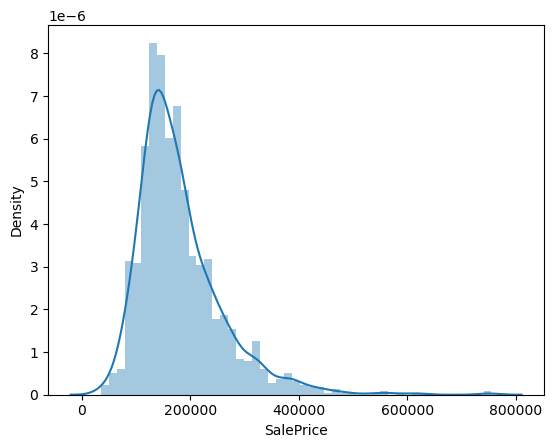

In [6]:
#通过图示化来进一步展示“SalePrice”
sns.distplot(data_train['SalePrice'])

这里有一些和kaggle不一样的地方


|| <matplotlib.axes._subplots.AxesSubplot at 0x7f23ac874a58>
还有图表和竖座标


可以看到与使用matplotlib作的直方图最大的区别在于有一条密度曲线（KDE），可以通过设置参数去掉这条默认的曲线。 另外由上图可以知道房价呈现正态分布。下面还可以看到两个统计学中的概念： 峰度（Kurtosis）和 偏度（Skewness）。


峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。

它是和正态分布相比较的。

Kurtosis=0 与正态分布的陡缓程度相同。

Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰

Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

Skewness=0 分布形态与正态分布偏度相同
Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

In [7]:
#skeness and kurtosis
print("Skeness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skeness: 1.882876
Kurtosis: 6.536282


在这里，他对一些特征数据进行了分类，用了excel文件。具体看例子吧。

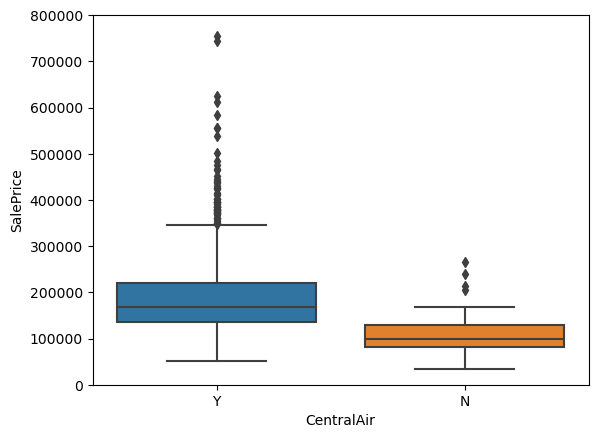

In [9]:
#CentralAir
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'],data_train[var]],axis = 1)
fig = sns.boxplot(x = var,y = "SalePrice",data = data)
fig.axis(ymin = 0,ymax = 800000);
#分析：很明显有中央空调的房价明显更高

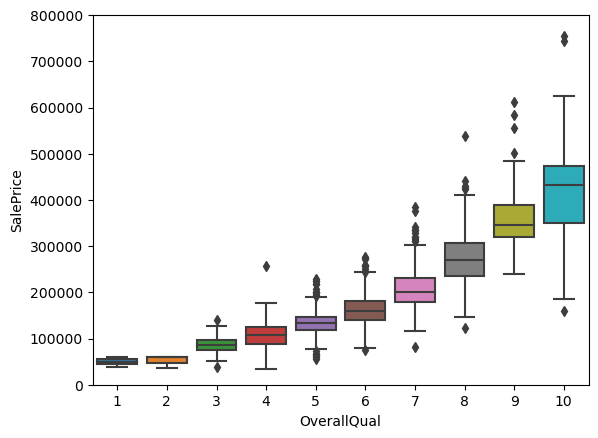

In [11]:
#OverallQual
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'],data_train[var]],axis = 1)
fig = sns.boxplot(x = var,y = "SalePrice",data = data)
fig.axis(ymin = 0,ymax = 800000);
#analysis:总体评价越好，房价越高

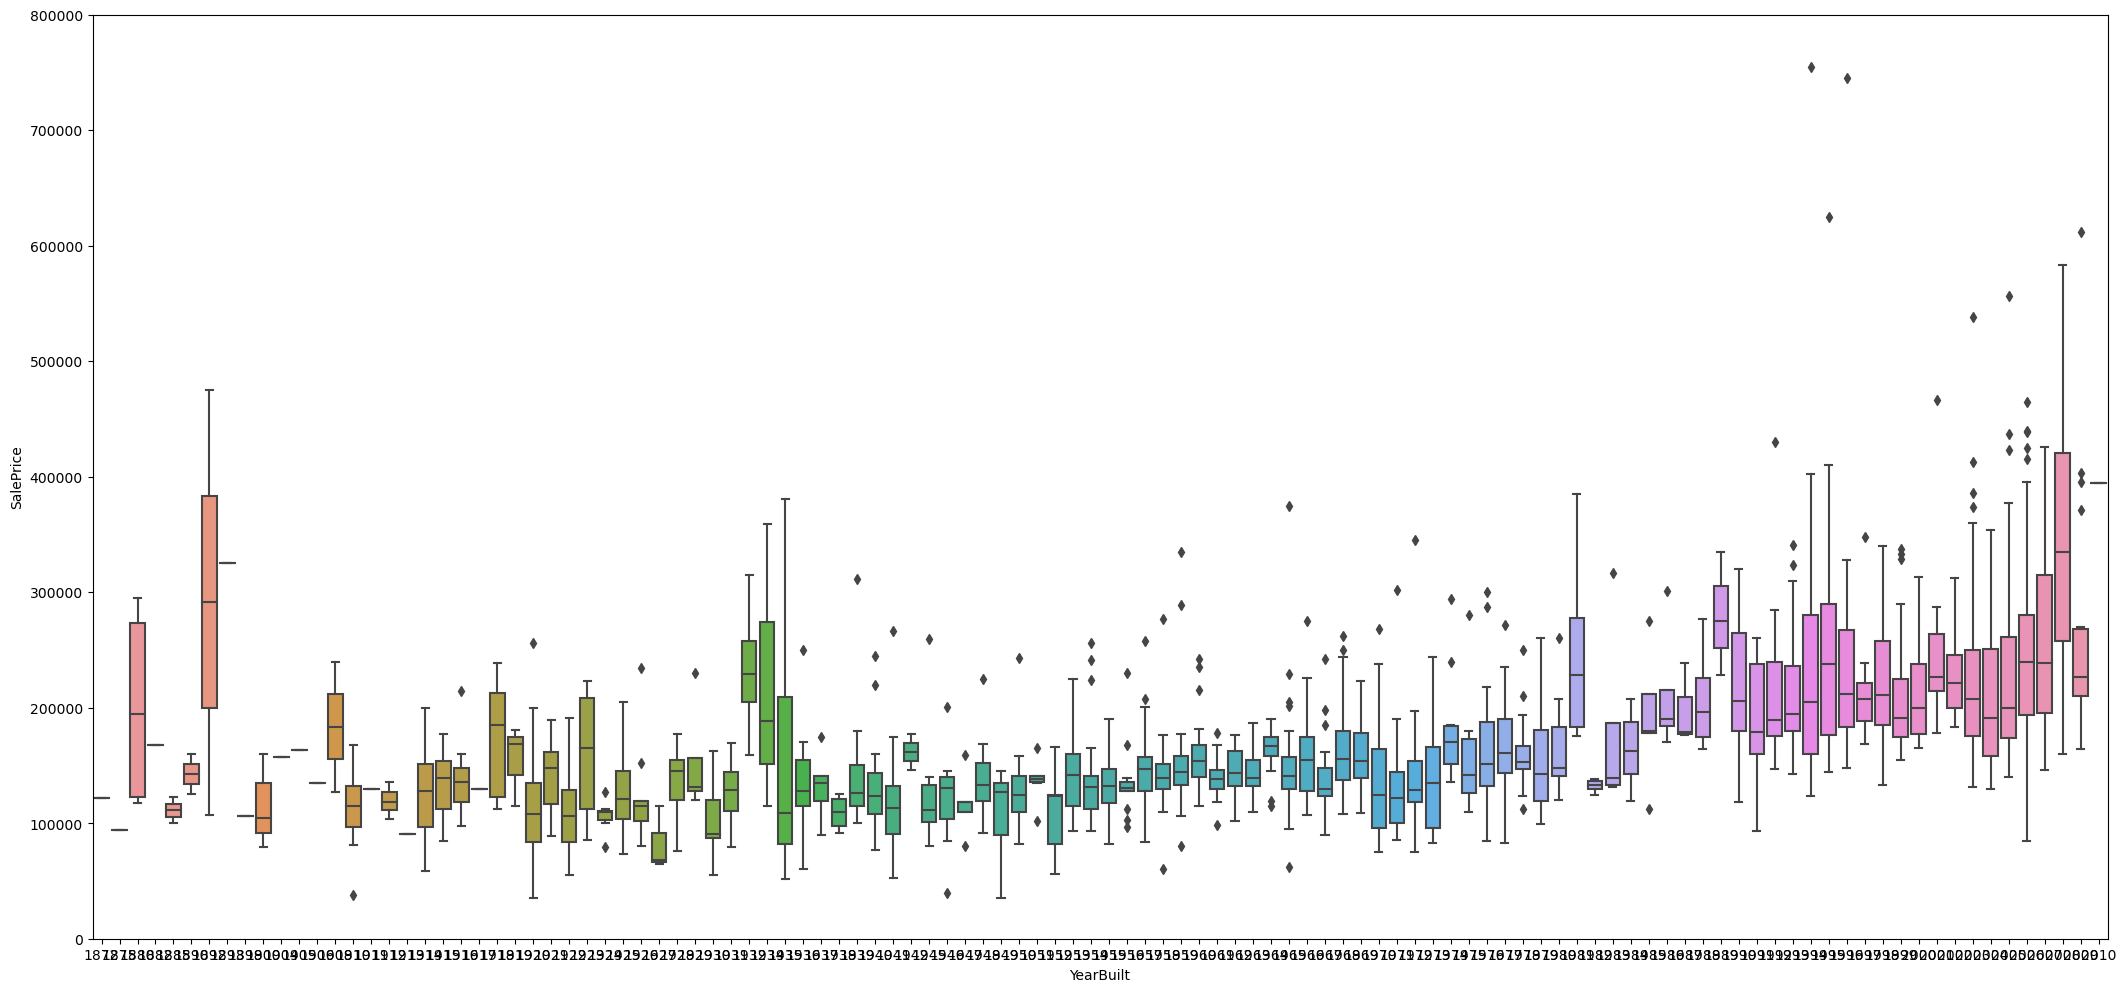

In [12]:
#YearBuilt boxplot()
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'],data_train[var]],axis = 1)
f, ax = plt.subplots(figsize = (26, 12))
fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000);

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

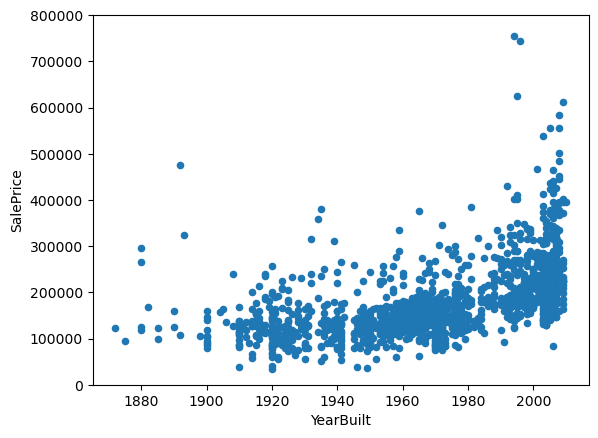

In [13]:
#YearBuilt scatter
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]],axis = 1)
data.plot.scatter(x = var, y = "SalePrice",ylim = (0, 800000))
#最开始我是用了箱线图绘制了房价与建造年份的关系，但是并不十分明显，所以又用点图来显示，可以很明显的看到有线性增长的趋势。

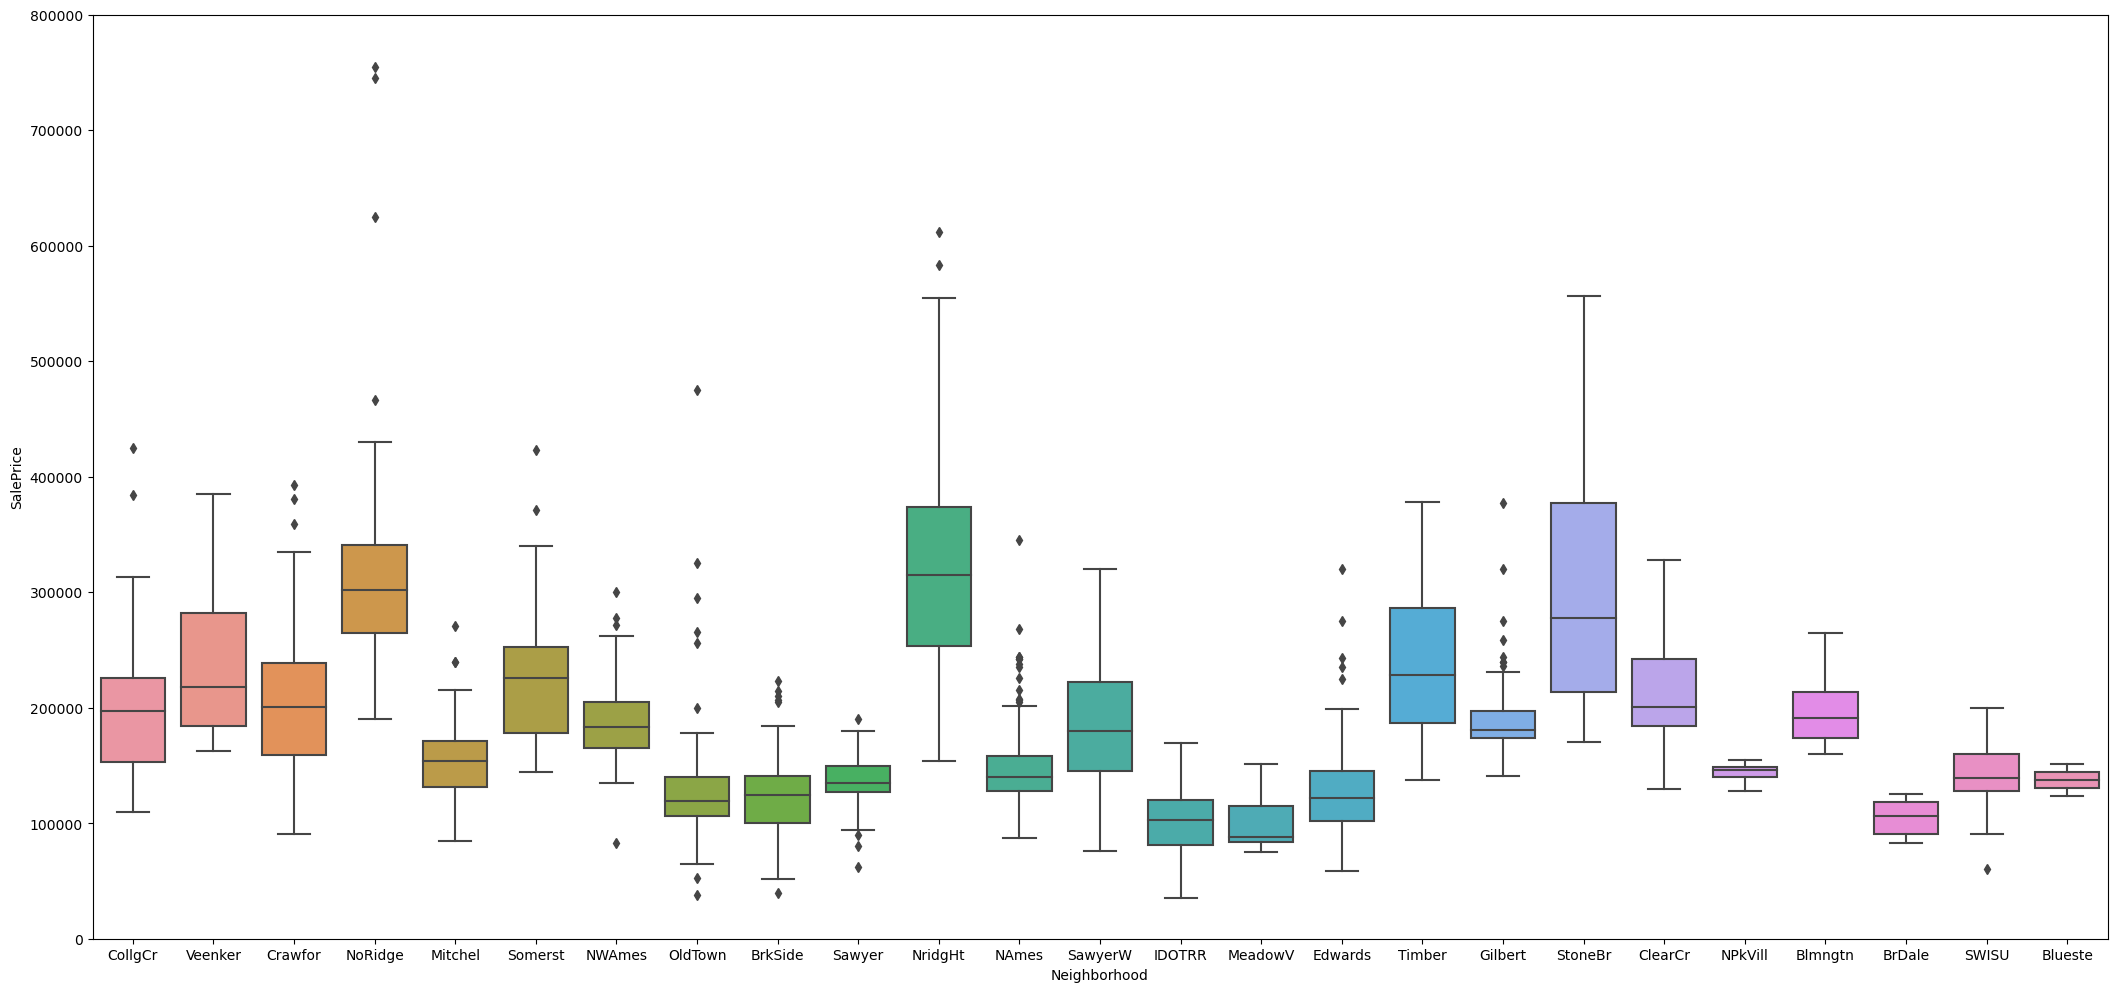

In [18]:
#Neighborhood
var = 'Neighborhood'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (26, 12))
fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000);
#fig.axis(ylim = (0, 800000));

In [19]:
location = []
for x in data['Neighborhood']:
    if x not in location:
        location.append(x)
data.sort_values(['Neighborhood','SalePrice'])
nb_data = data

<Axes: xlabel='LotArea', ylabel='SalePrice'>

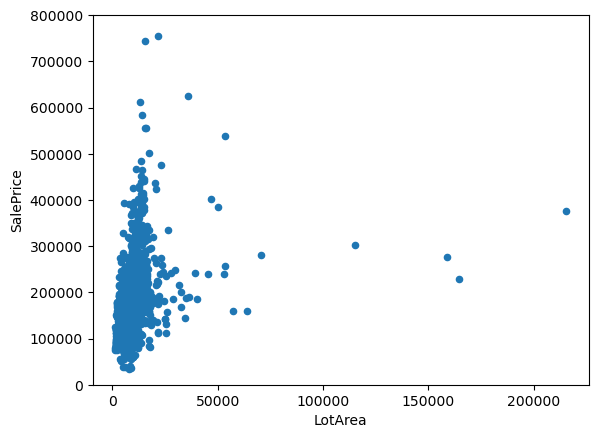

In [20]:
#LotArea
var = 'LotArea'
data = pd.concat([data_train['SalePrice'],data_train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

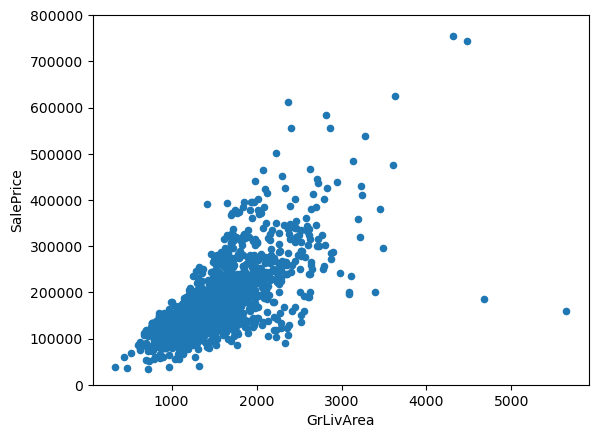

In [21]:
#GrLivArea
var = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

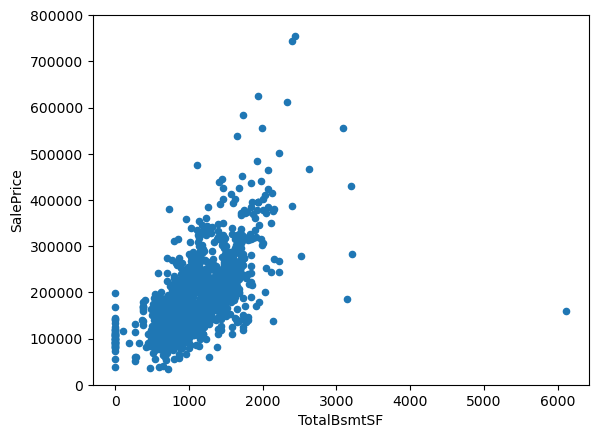

In [22]:
#TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

<Axes: xlabel='MiscVal', ylabel='SalePrice'>

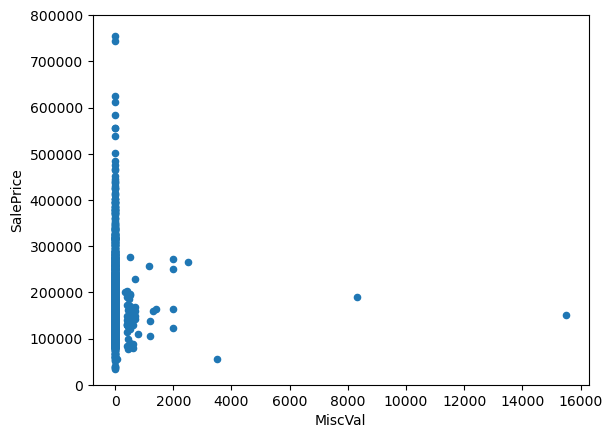

In [23]:
#MiscVal
var = 'MiscVal'
data = pd.concat([data_train['SalePrice'],data_train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))
#附加值对售价没有很大影响，不予考虑

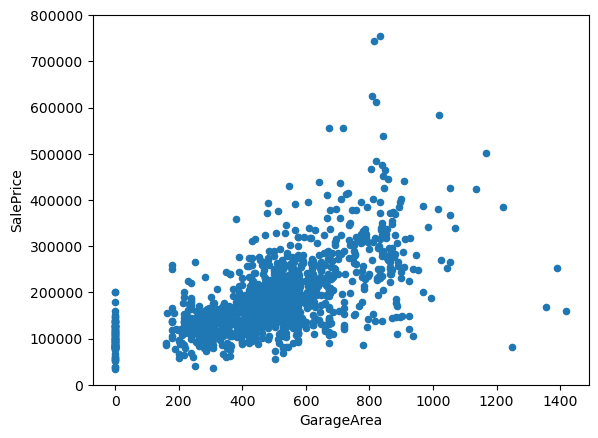

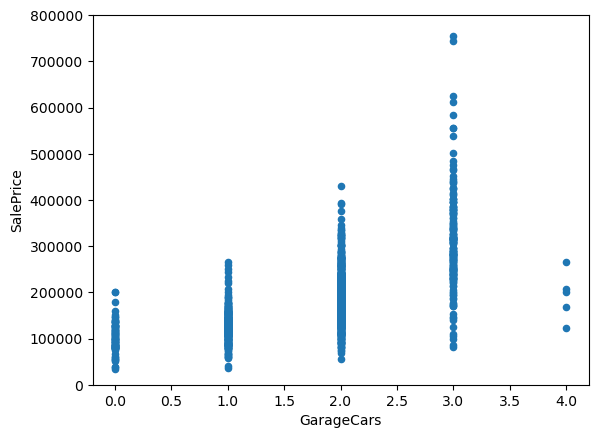

In [26]:
#GarageArea/GarageCars
var = ['GarageArea','GarageCars']#注意把两个分开
for index in range(2):
    data = pd.concat([data_train['SalePrice'], data_train[var[index]]], axis = 1)
    data.plot.scatter(x = var[index], y = 'SalePrice', ylim = (0, 800000))
    #由上面点图可以看出房价与车库面积和容纳车辆数呈现线性关系，所以入选主要特征

三、更加科学的分析数据
上面的分析可以说非常主观，所以说多多少少还是会不放心，会担心自己选择的特征会不会多了或者少了，又或者选了一些没有太大作用的特征，所以接下来需要进行更加科学的分析。

为了做到更加科学，我们需要作如下工作：

得到各个特征之间的关系矩阵（correlation matrix）
'SalePrice'的关系矩阵
绘制出最相关的特征之间的关系图

<Axes: >

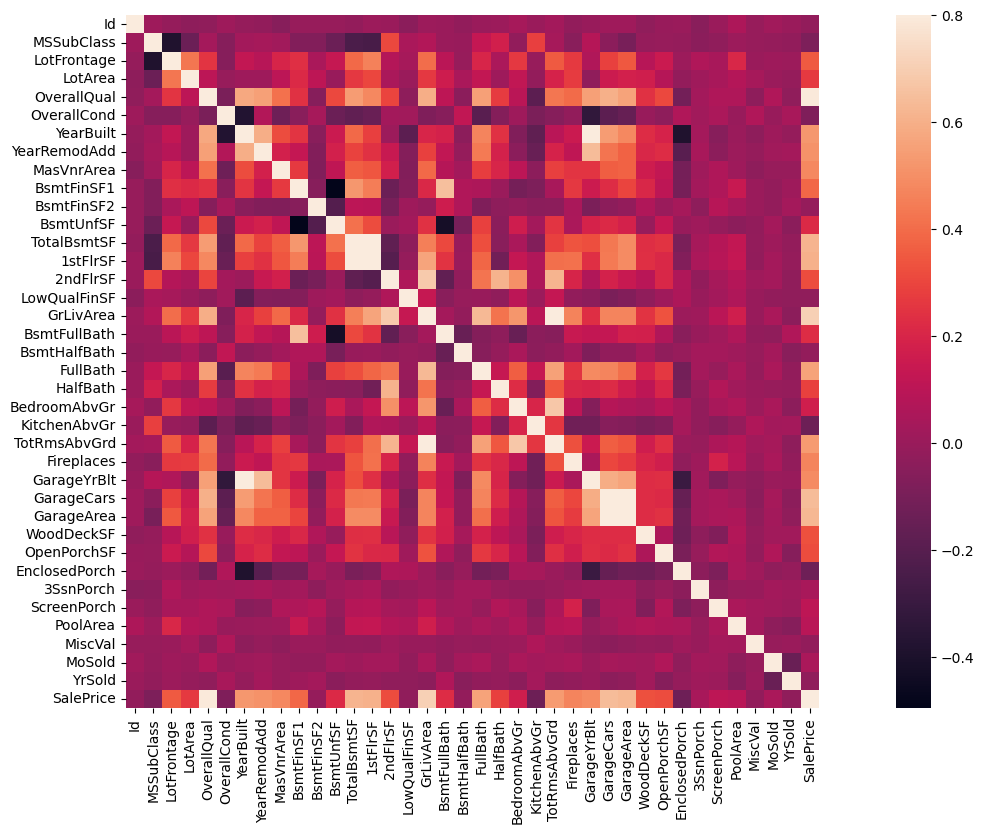

In [27]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize = (20, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)
///
震惊之后我们可以由图直到，像素块越红表示两者之间相关性越强，我们可以很清楚地看到与“SalePrice”相关性很强的有：

OverallQual：总评价
YearBuilt：建造年份
ToatlBsmtSF：地下室面积
1stFlrSF：一楼面积
GrLiveArea：生活区面积？
FullBath：浴室？what。。。到底什么意思，知道的麻烦说一下
TotRmsAbvGrd：总房间数（不包括浴室）
GarageCars：车库可容纳车辆数
GarageArea：车库面积
看来之前我主观意见选择的特征和这相关矩阵显示的还是挺接近的，23333~~~

需要注意的是上面选取的特征也都是我靠肉眼判断颜色深浅选择的，所以还不是非常科学，后面会更加科学，尽情期待。

还需要注意的是上面的特征中有好几个是类似的，例如GarageCars和GarageArea，ToatlBsmtSF和1stFlrSF，至于怎么取舍看下面的分析。

最后突然发现上面的矩阵只是数值型的，像Neighborhood这种离散型数据则没有参与计算，所以下面尝试着使用sklearn来对这些特征进行处理。
///

<Axes: >

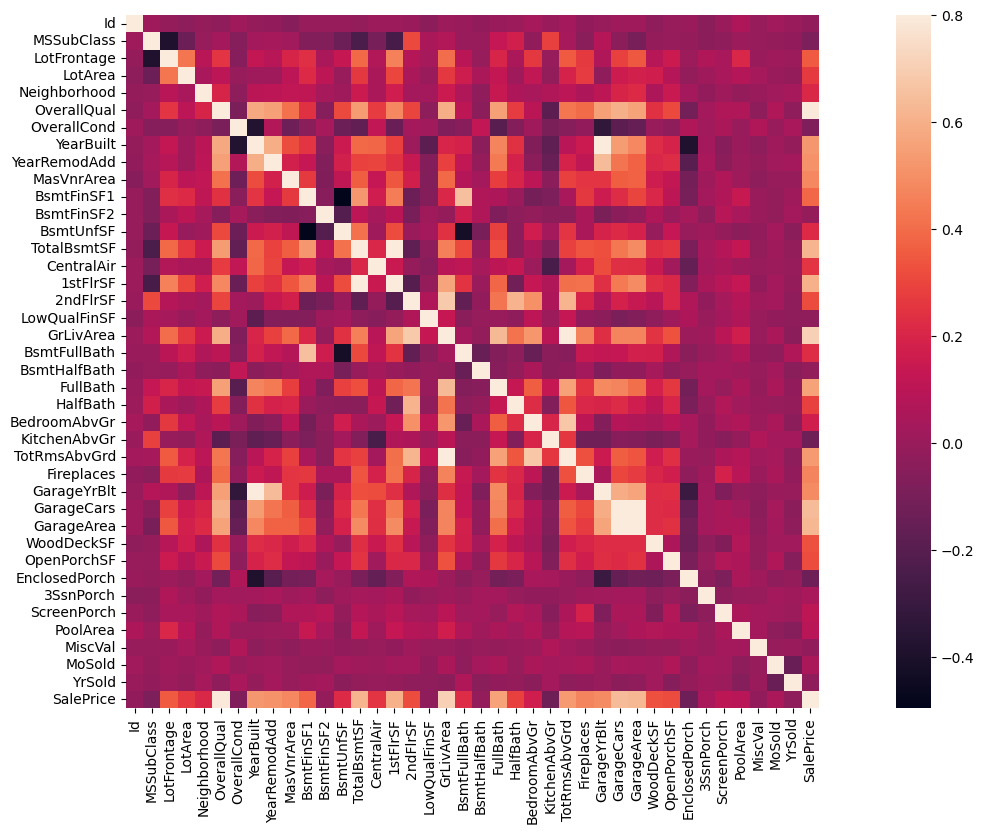

In [29]:
from sklearn import preprocessing
f_names = ['CentralAir','Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corrmat = data_train.corr()
f, ax = plt.subplots(figsize = (20, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)

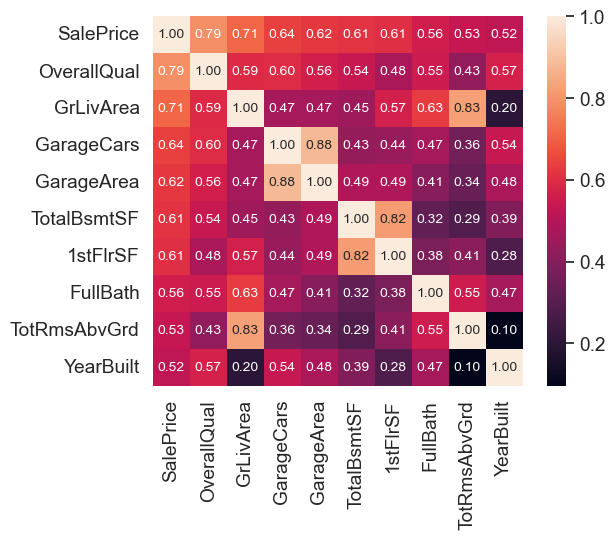

In [37]:
#房价关系矩阵
k = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', \
                 annot_kws = {'size':10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()
#这里出现了问题：NameError: name 'np' is not defined,这是为什么？我打的代码和例子一样。
#原因找到了：在In [1]没有  import numpy as np

由上图可以看出

‘OverallQual’，‘GrLiveArea’相关性非常强，与我们的预期一致，所以果断入选判断标准。

'GarageCars'和'GarageArea'也都双双进入关系户行列，但是我们知道，这两者留一个就够了，所以选择后台更硬的'GarageCars'。（这里必须炫耀一下，在最前的主观分析中我选择了这两个特征，但是大佬没有~，略开心~~~，然并卵。。。。）

接下来是‘TotalBsmSF’和'1stFlrSF'，同理，这二者也类似，所以我们选择‘TotalBsmSF’（有一点想不通的事'1stFlrSF（一楼面积）'相关性居然这么强？求二楼面积的心理阴影）

'FullBath'这个特征其实我都不知道什么意思。。。，反正听科学的就行。

'TotRmsAbvGrd'和'GrLiveArea'这二者也类似。。。但是要我个人说我是希望这两个特征都留下，因为感觉并不是很冲突，给我的感觉面积越大，而且房间数量适当的多我会更喜欢，当然个人觉得房价也会越高。

‘YearBuilt’，这个东西在中国还是挺适合的。。。房价只会越来越贵，不知道什么时候会降价，或者说不再涨价。。。

绘制关系点图

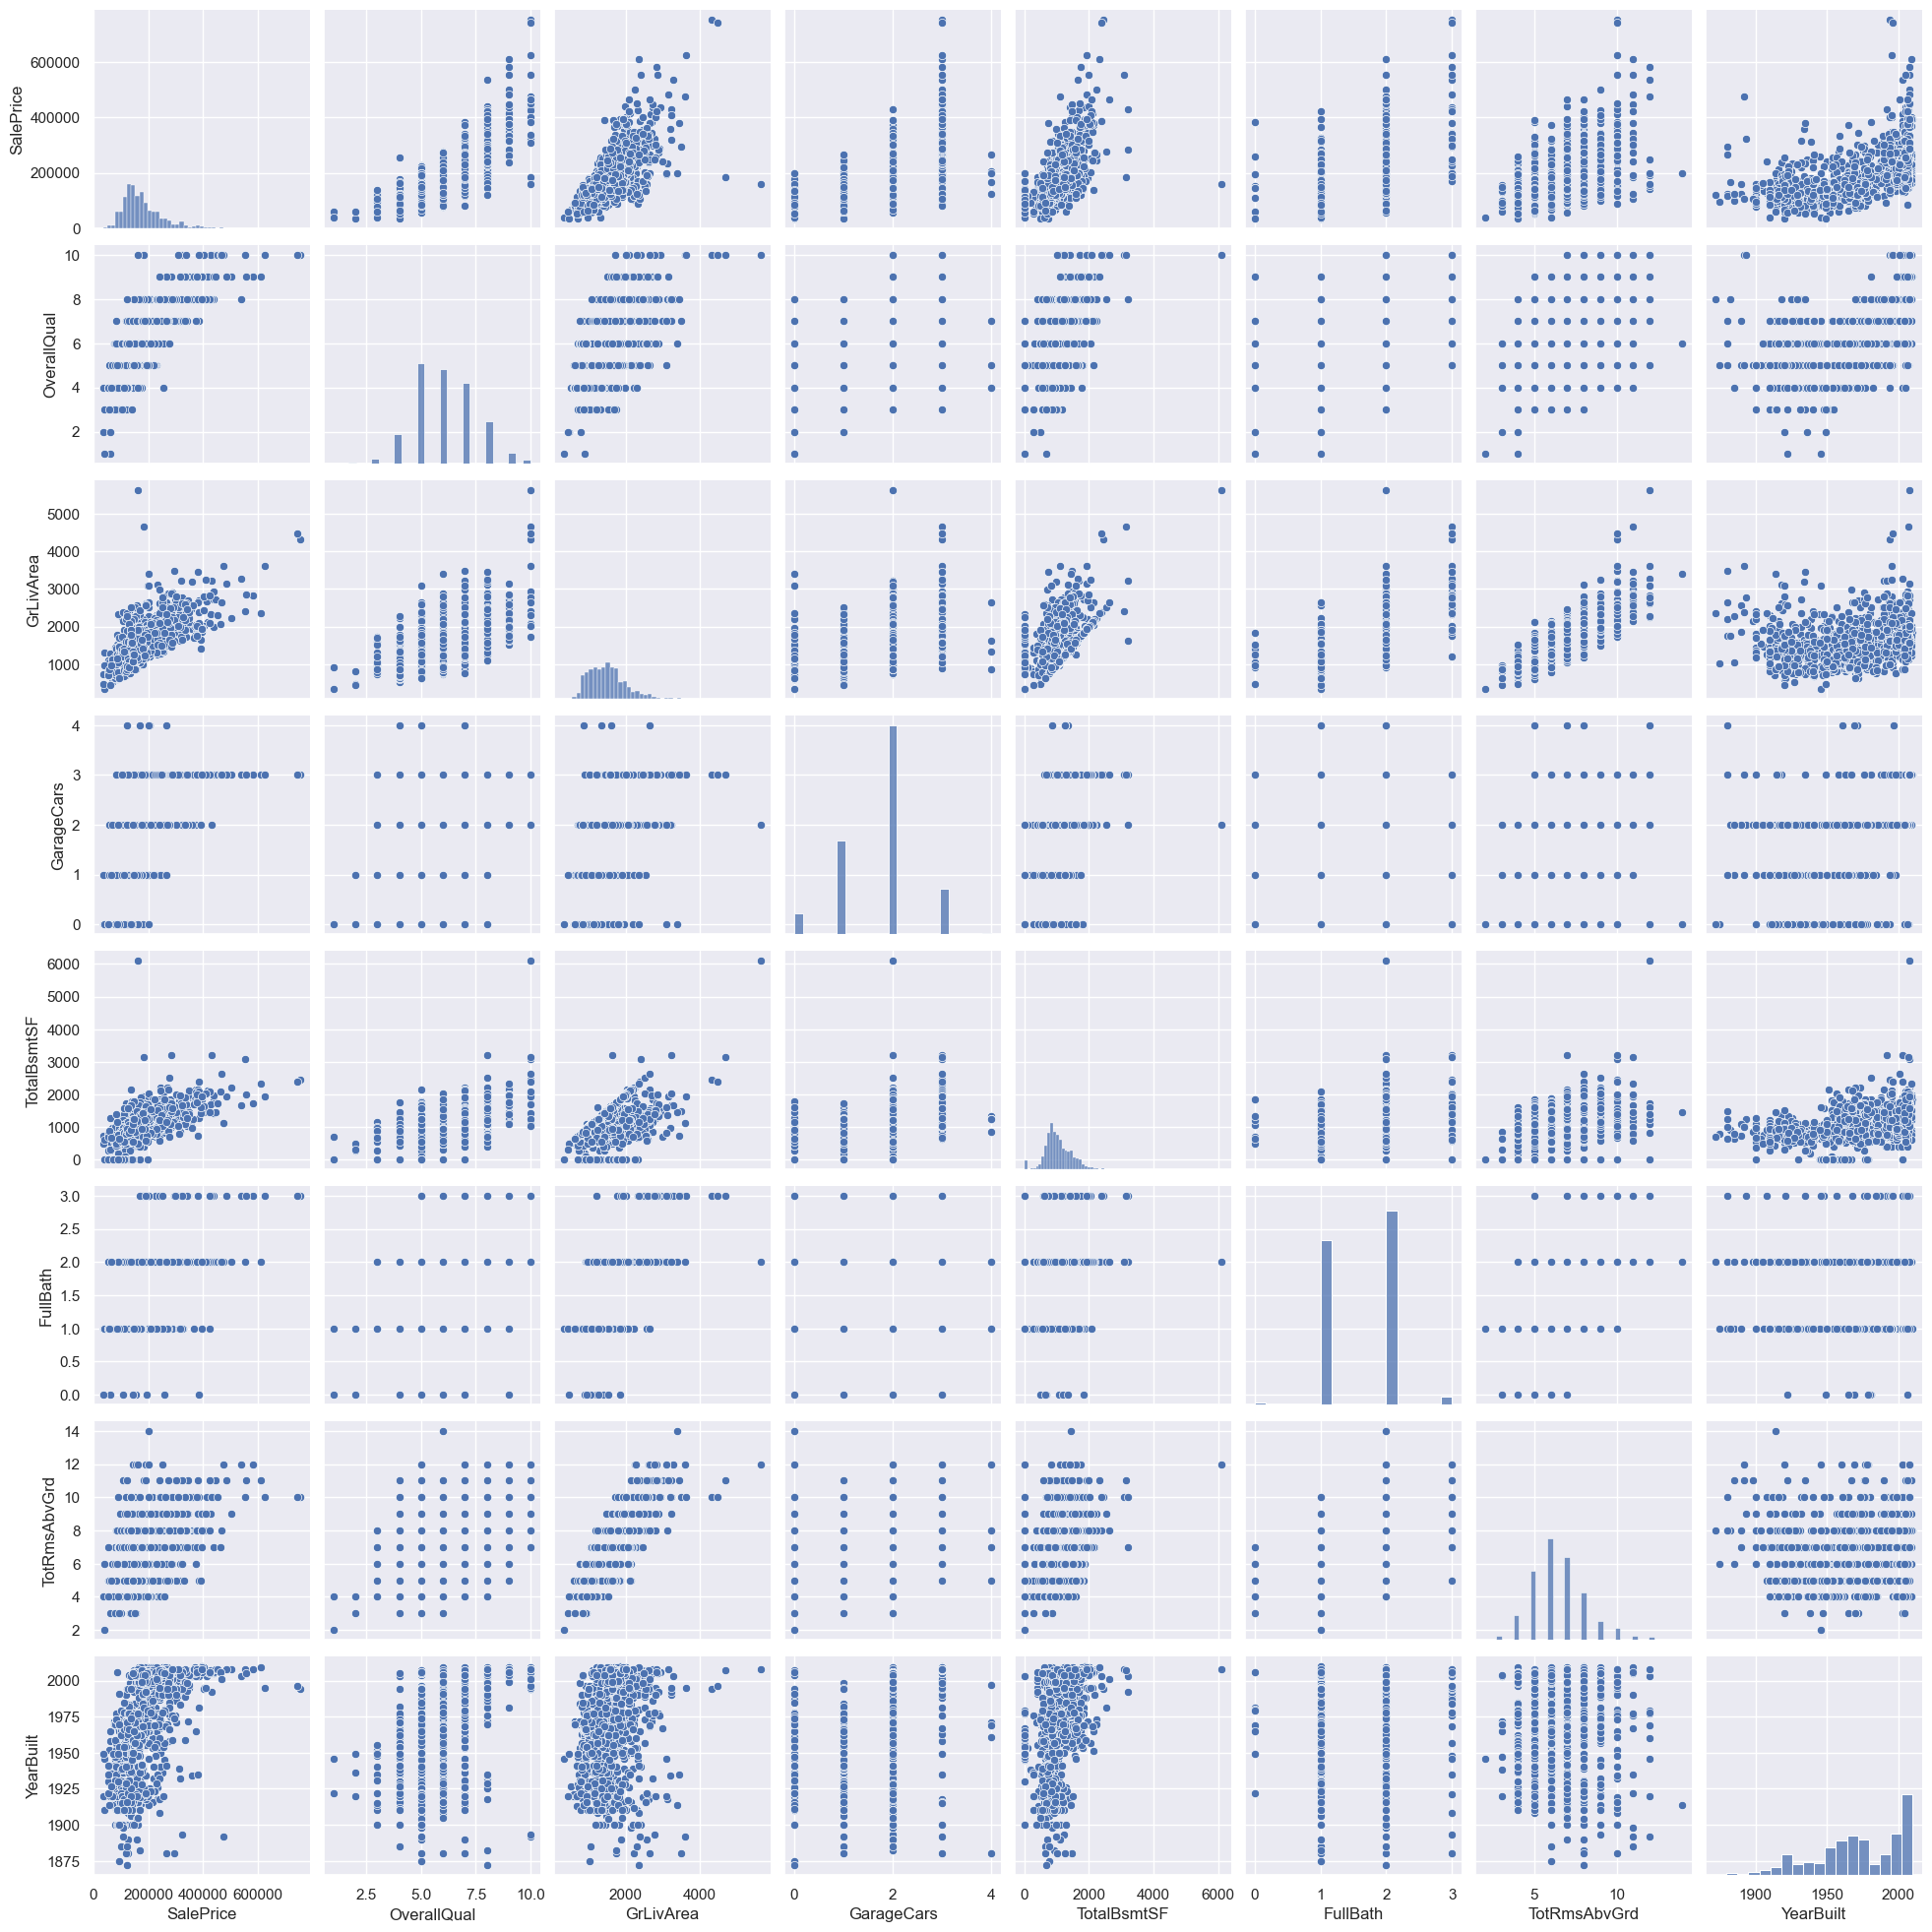

In [38]:
sns.set()
cols = ['SalePrice', 'OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()

开始模拟数据

In [45]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
#又出错了（越到后面越会出错）ModuleNotFoundError: No module named 'sklearn.cross_validation'
#网上搜索解决：为sklearn版本升级导致的，因为当版本升级后，函数的用法或者属性有所改变。
#可以先查看一下版本，如图所示，可知版本较新！
#将源代码改为 from sklearn.model_selection import train_test_split  即可运行

In [48]:
#获取数据
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = 0.33, random_state = 42)
#打错了几个地方，改过来了

In [49]:
clfs = {
    'svm':svm.SVR(),
    'RandomForestRegressor':RandomForestRegressor(n_estimators = 400),
    'BayesianRidge':linear_model.BayesianRidge()
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + "Error:")
        print(str(e))
#前2个数据和例子不一样，但差别好像不大

svm cost:-18.002439870767606
RandomForestRegressor cost:-2.835917161020538
BayesianRidge cost:-17.191504693239164


In [50]:
#由上面结果选择随机森林回归算法，为了更直观地观察训练结果，我将显示一下未归一化数据的预测效果。（虽然我不知道是什么意思）
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

clf = RandomForestRegressor(n_estimators = 400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

#保存clf,共下面计算测试集使用
#rfr = clf

[141078.875      311067.69       125172.875      170980.375
 308193.285       78960.875      191337.75       153361.3
  78984.         115136.535      160970.295      122131.
  91821.5        221781.54       190055.375      122488.875
 193123.5        132453.625      119904.635      195898.8
 165755.16       221639.5925     170111.121875   123813.12916667
 186130.0375     167146.35       201830.94        97059.125
 186304.         203652.25       111414.51       232257.9
 174714.0075     110404.875      256705.62       139472.
 161411.5525     205229.         311284.895      106806.75
 133164.875      231006.25       119382.65       371832.615
 139653.4        167865.775      125955.6875     115544.525
 433816.3325     146680.0575     118549.         185165.375
 125304.13738095 347014.985      144202.33779762 242535.055
 196211.94083333 154408.875      151439.         103025.83333333
  83787.03571429 141801.875      312412.47       297653.2075
 259804.1        229631.7875     112118.  

In [51]:
y_test

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [52]:
sum(abs(y_pred - y_test))/len(y_pred)

19659.71092077899

检验测试集数据

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

#之前训练的模型（我还是不懂。。。）
rfr = clf

In [55]:
#data_test = pd.read_csv("../input/test.csv")

#data_test = pd.read_csv("./test.csv")
#data_test[cols].isnull().sum()
#例子是这样写的，好像版本有一些不一样
data_test = pd.read_csv("test.csv")
data_test[cols].isnull().sum()
#我的是可以运行的

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

因为数据中存在缺失值，所以不能直接predict，而且缺失值较少，所以我直接在excel文件中将缺失值改为了该列的均值。所以需要先算出平均值。
GarageCars      1
TotalBsmtSF     1
是这两个有缺失值

In [57]:
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [59]:
data_test['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [60]:
data_train['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [61]:
#例子说
# 不知道为什么fillna函数对data_test[cols]总是不起作用，所以只好用最笨的办法了
#data_test[ ['GarageCars'] ].fillna(1.766118, inplace=True)
#data_test[ ['TotalBsmtSF']].fillna(1046.117970, inplace=True) 
#data_test[cols].fillna(data_test[cols].mean())
#data_test[cols].isnull().sum()
cols2 = ['OverallQual', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
cars = data_test['GarageCars'].fillna(1.766118)
bsmt = data_test['TotalBsmtSF'].fillna(1046.117970)
data_test_x = pd.concat([data_test[cols2],cars,bsmt],axis = 1)
data_test_x.isnull().sum()

OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [62]:
x = data_test_x.values
y_te_pred = rfr.predict(x)
print(y_te_pred)

print(y_te_pred.shape)
print(x.shape)

[ 96167.135 104929.68  133349.92  ... 100131.29   95923.26  175190.85 ]
(1459,)
(1459, 7)


In [64]:
data_test_x

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,YearBuilt,GarageCars,TotalBsmtSF
0,5,896,1,5,1961,1.0,882.0
1,6,1329,1,6,1958,1.0,1329.0
2,5,1629,2,6,1997,2.0,928.0
3,6,1604,2,7,1998,2.0,926.0
4,8,1280,2,5,1992,2.0,1280.0
...,...,...,...,...,...,...,...
1454,4,1092,1,5,1970,0.0,546.0
1455,4,1092,1,6,1970,1.0,546.0
1456,5,1224,1,7,1960,2.0,1224.0
1457,5,970,1,6,1992,0.0,912.0


In [65]:
prediction = pd.DataFrame(y_te_pred, columns = ['SalePrice'])
result = pd.concat([data_test['Id'], prediction], axis = 1)
#result = result.drop(result.columns[0],1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [66]:
#保存预测结果

result.to_csv('Prediction.csv',index = False)